In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Creating URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collecting HTML data from this page
    response = requests.get(url)

    # Parsing content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["data"] = reviews
df.head()

,data
0,✅ Trip Verified | Easy check in a T5. Galleri...
1,"Not Verified | Flight delayed by an hour, it ..."
2,Not Verified | The staff are very rude and not...
3,✅ Trip Verified | Good domestic flight operat...
4,Not Verified | Failed at all basic travel fund...


In [4]:
print(df.shape)


(1000, 1)


In [5]:
df['data'] = df.data.str.split('|', expand=True)[1]


In [6]:
df

,data
0,Easy check in a T5. Galleries south and Nort...
1,"Flight delayed by an hour, it happens, no bi..."
2,The staff are very rude and not trained prope...
3,Good domestic flight operated by BA Cityflye...
4,Failed at all basic travel fundamentals: 1) O...
...,...
995,Johannesburg to London. I tend to stay with ...
996,Singapore to London Heathrow. It's my first ...
997,London to Los Angeles. Booked this trip eigh...
998,Miami to London Heathrow. As with many other...


<h1 style: "color= black"> SENTIMENT ANALYSIS </h1>

# <span style = "colou:black" > Text Cleaning </span>
 Here, we'll clean the review text by converting it to lowercase and removing special characters and digits.

In [7]:
import re

# creating a Function to clean text
def clean_text(text):
    text = text.lower()  # Converting to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removing special characters and digits
    return text

# Applying the text cleaning function to the 'reviews' column
df['lower'] = df['data'].apply(clean_text)


In [8]:
df

,data,lower
0,Easy check in a T5. Galleries south and Nort...,easy check in a t galleries south and north ...
1,"Flight delayed by an hour, it happens, no bi...",flight delayed by an hour it happens no bigg...
2,The staff are very rude and not trained prope...,the staff are very rude and not trained prope...
3,Good domestic flight operated by BA Cityflye...,good domestic flight operated by ba cityflye...
4,Failed at all basic travel fundamentals: 1) O...,failed at all basic travel fundamentals our ...
...,...,...
995,Johannesburg to London. I tend to stay with ...,johannesburg to london i tend to stay with a...
996,Singapore to London Heathrow. It's my first ...,singapore to london heathrow its my first ti...
997,London to Los Angeles. Booked this trip eigh...,london to los angeles booked this trip eight...
998,Miami to London Heathrow. As with many other...,miami to london heathrow as with many others...


In [91]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [96]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer

# Functions to handle negations, performing POS tagging, obtaining stem words, and removing stop words
def process_text(text):
    tokens = nltk.word_tokenize(text)
    # Defining negation words
    negation_words = set(["not", "no", "never"])  
    
    # Initialising negation scope
    negation_scope = False  

    # Initialising lists to store modified tokens, POS tags, and stemmed words
    modified_tokens = []
    pos_tags = []

    # Initialising the Porter Stemmer
    stemmer = PorterStemmer()

    # Downloading stopwords
    nltk.download('stopwords')
    
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))

    for token in tokens:
        # Setting negation scope to True when a negation word is encountered
        if token.lower() in negation_words:
            negation_scope = True  
        #Adding "not_" prefix to words within negation scope
        elif token.isalpha():
            if negation_scope:
                token = "not_" + token 
            modified_tokens.append(token)
            # Performing POS tagging and storing them 
            pos_tags.append(nltk.pos_tag([token])[0][1])

    # Joining the modified tokens back into text
    modified_text = ' '.join(modified_tokens)

    # Obtaining stem words
    stemmed_words = [stemmer.stem(word) for word in modified_tokens]

    # Removing stop words
    cleaned_words = [word for word in stemmed_words if word not in stop_words]

    return modified_text, pos_tags, cleaned_words

# Applying text processing to the 'lower' column
df['processed_text'], df['pos_tags'], df['cleaned_words'] = zip(*df['lower'].apply(process_text))

# Performing sentiment analysis using VADER on the processed text
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['processed_text'].apply(lambda x: analyzer.polarity_scores(x))

# Extracting the compound sentiment score
df['compound_sentiment'] = df['sentiment_scores'].apply(lambda x: x['compound'])


print(df[['lower', 'processed_text', 'pos_tags', 'cleaned_words', 'compound_sentiment']])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravind/nltk_data...
[nltk_data]   Package stopwords is already up-t

                                                 lower  \
0      easy check in a t galleries south and north ...   
1      flight delayed by an hour it happens no bigg...   
2     the staff are very rude and not trained prope...   
3      good domestic flight operated by ba cityflye...   
4     failed at all basic travel fundamentals  our ...   
..                                                 ...   
995    johannesburg to london i tend to stay with a...   
996    singapore to london heathrow its my first ti...   
997    london to los angeles booked this trip eight...   
998    miami to london heathrow as with many others...   
999   london heathrow to milan malpensa worst airli...   

                                        processed_text  \
0    easy check in a t galleries south and north lo...   
1    flight delayed by an hour it happens not_biggi...   
2    the staff are very rude and not_trained not_pr...   
3    good domestic flight operated by ba cityflyer ...   
4    failed a

In [97]:
# Defining the threshold values for sentiment labels
positive_threshold = 0.2
negative_threshold = -0.2

# Functions to categorize sentiment based on compound score
def categorize_sentiment(score):
    if score > positive_threshold:
        return 'positive'
    elif score < negative_threshold:
        return 'negative'
    else:
        return 'neutral'

# Applying sentiment categorization to the 'compound_sentiment' column
df['sentiment_label'] = df['compound_sentiment'].apply(categorize_sentiment)

# Printing the dataframe with sentiment labels
print(df[['lower', 'negation_handled', 'compound_sentiment', 'sentiment_label']])



                                                 lower  \
0      easy check in a t galleries south and north ...   
1      flight delayed by an hour it happens no bigg...   
2     the staff are very rude and not trained prope...   
3      good domestic flight operated by ba cityflye...   
4     failed at all basic travel fundamentals  our ...   
..                                                 ...   
995    johannesburg to london i tend to stay with a...   
996    singapore to london heathrow its my first ti...   
997    london to los angeles booked this trip eight...   
998    miami to london heathrow as with many others...   
999   london heathrow to milan malpensa worst airli...   

                                      negation_handled  compound_sentiment  \
0    easy check in a t galleries south and north lo...              0.9469   
1    flight delayed by an hour it happens not_biggi...             -0.2263   
2    the staff are very rude and not_trained not_pr...             -0

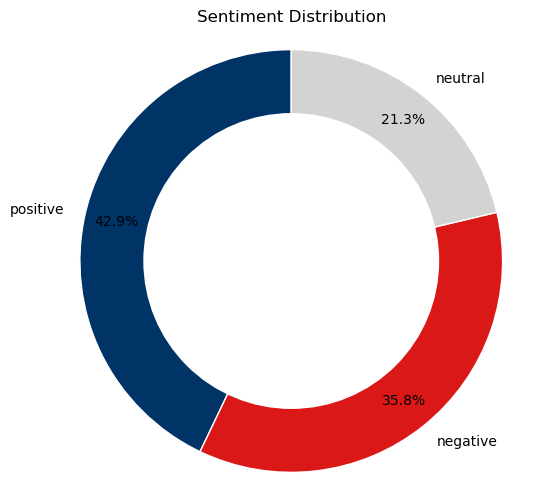

In [102]:
import matplotlib.pyplot as plt

# Counting the number of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

ba_colors = ['#003366', '#db1818', 'lightgray']

# Plotting the doughnut chart
ax.pie(sentiment_counts, labels=sentiment_counts.index, colors=ba_colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title("Sentiment Distribution")

plt.show()


<h1 style :"color=black"> TOPIC MODELLING </h1>

We're using a text analysis approach called Latent Dirichlet Allocation (LDA) to uncover underlying themes or topics hidden within the reviews. 

In [19]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [103]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from pprint import pprint

# Creating a dictionary and corpus from cleaned words
dictionary = corpora.Dictionary(df['cleaned_words'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['cleaned_words']]

# Building the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, random_state=42)

# The topics and their representative words
pprint(lda_model.print_topics())

# Assigning the most relevant topic to each document
df['main_topic'] = [max(topics, key=lambda x: x[1])[0] for topics in lda_model[corpus]]


[(0,
  '0.034*"not_th" + 0.025*"not_to" + 0.023*"not_a" + 0.022*"not_i" + '
  '0.020*"not_and" + 0.019*"not_wa" + 0.010*"not_for" + 0.010*"not_on" + '
  '0.009*"not_of" + 0.008*"not_in"'),
 (1,
  '0.035*"not_th" + 0.025*"not_to" + 0.024*"not_and" + 0.021*"not_i" + '
  '0.019*"not_a" + 0.011*"not_in" + 0.010*"not_wa" + 0.010*"not_flight" + '
  '0.010*"not_of" + 0.010*"not_on"'),
 (2,
  '0.028*"not_th" + 0.026*"wa" + 0.015*"not_to" + 0.014*"not_i" + '
  '0.014*"flight" + 0.013*"not_a" + 0.012*"not_wa" + 0.010*"not_on" + '
  '0.009*"not_and" + 0.009*"not_of"')]


In [21]:
pip install numpy==1.23.3 

  Using cached numpy-1.23.3-cp310-cp310-macosx_11_0_arm64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install pyLDAvis


  Using cached numpy-1.25.2-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [104]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.011248 -0.006509       1        1  39.668259
0     -0.015350  0.005873       2        1  33.870749
2      0.026598  0.000636       3        1  26.460992, topic_info=        Term         Freq        Total Category  logprob  loglift
56        wa  1458.000000  1458.000000  Default  30.0000  30.0000
18    flight  1028.000000  1028.000000  Default  29.0000  29.0000
135       ba   471.000000   471.000000  Default  28.0000  28.0000
222   not_wa  1539.000000  1539.000000  Default  27.0000  27.0000
9       crew   231.000000   231.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
458  not_wer   113.828345   494.053747   Topic3  -5.5690  -0.1385
91    not_it   129.661656   698.799492   Topic3  -5.4387  -0.3549
81   not_for   129.773546   940.413369   Topic3  -5.4379  -0.6510
201   not_in   118.788707   931.305298   Topic3  -5.5263  -0.7297
310  not_hav   111.814933   536.431382   Topic3  -5.5868  -0.2386

[293 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
853       3  0.752611  afford
7268      2  0.505317   agoni
160       1  0.184799   allow
160       2  0.246398   allow
160       3  0.585195   allow
...     ...       ...     ...
706       1  0.289849    well
706       2  0.178368    well
706       3  0.535105    well
5527      1  0.284568    wide
5527      3  0.569136    wide

[522 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

<h1> WorldCloud </h1>

The  visual representation of text data that displays the most frequently occurring words in a larger font size, providing a quick and intuitive way to identify key themes, trends, or prominent terms within a body of text.

In [24]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [106]:
df

,data,lower,POS tagged,lemmatized,sentiment,sentiment_label,main_topic,positive_tokens_cleaned,negative_tokens_cleaned,neutral_tokens_cleaned,negation_handled,sentiment_scores,compound_sentiment,processed_text,pos_tags,stemmed_words,cleaned_words
0,Easy check in a T5. Galleries south and Nort...,easy check in a t galleries south and north ...,"[easy, check, galleries, south, north, lounges...","[easy, check, gallery, south, north, lounge, p...",0.201085,positive,2,"[easy, check, gallery, south, north, lounge, p...",NaN,NaN,easy check in a t galleries south and north lo...,"{'neg': 0.066, 'neu': 0.719, 'pos': 0.215, 'co...",0.9469,easy check in a t galleries south and north lo...,"[JJ, NN, IN, DT, NN, NNS, NN, CC, NN, NNS, NNS...","[easi, check, in, a, t, galleri, south, and, n...","[easi, check, galleri, south, north, loung, pa..."
1,"Flight delayed by an hour, it happens, no bi...",flight delayed by an hour it happens no bigg...,"[flight, delayed, hour, happens, biggie, us, c...","[flight, delayed, hour, happens, biggie, u, ch...",0.225000,negative,1,"[delayed, happens, biggie, u, change, gate, ai...",NaN,NaN,flight delayed by an hour it happens not_biggi...,"{'neg': 0.029, 'neu': 0.971, 'pos': 0.0, 'comp...",-0.2263,flight delayed by an hour it happens not_biggi...,"[NN, NNS, IN, DT, NN, PRP, NNS, NN, NNS, NN, N...","[flight, delay, by, an, hour, it, happen, not_...","[flight, delay, hour, happen, not_biggi, not_h..."
2,The staff are very rude and not trained prope...,the staff are very rude and not trained prope...,"[staff, rude, trained, properly, exceptions, m...","[staff, rude, trained, properly, exception, ma...",-0.300000,negative,1,NaN,"[staff, rude, trained, properly, exception, ma...",NaN,the staff are very rude and not_trained not_pr...,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",-0.5095,the staff are very rude and not_trained not_pr...,"[DT, NN, VBP, RB, NN, CC, VBN, RB, NNS, NN, NN...","[the, staff, are, veri, rude, and, not_train, ...","[staff, veri, rude, not_train, not_properli, n..."
3,Good domestic flight operated by BA Cityflye...,good domestic flight operated by ba cityflye...,"[good, domestic, flight, operated, ba, cityfly...","[good, domestic, flight, operated, ba, cityfly...",0.236111,positive,2,"[domestic, operated, cityflyer, ground, checki...",NaN,NaN,good domestic flight operated by ba cityflyer ...,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.9419,good domestic flight operated by ba cityflyer ...,"[JJ, JJ, NN, VBN, IN, NN, NN, NN, NN, IN, NN, ...","[good, domest, flight, oper, by, ba, cityfly, ...","[good, domest, flight, oper, ba, cityfly, grou..."
4,Failed at all basic travel fundamentals: 1) O...,failed at all basic travel fundamentals our ...,"[failed, basic, travel, fundamentals, flight, ...","[failed, basic, travel, fundamental, flight, d...",-0.265714,negative,2,NaN,"[failed, basic, travel, fundamental, delayed, ...",NaN,failed at all basic travel fundamentals our fl...,"{'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'comp...",-0.9019,failed at all basic travel fundamentals our fl...,"[VBD, IN, DT, JJ, NN, NNS, PRP$, NN, VBD, NNS,...","[fail, at, all, basic, travel, fundament, our,...","[fail, basic, travel, fundament, flight, wa, d..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Johannesburg to London. I tend to stay with ...,johannesburg to london i tend to stay with a...,"[johannesburg, london, tend, stay, airline, fr...","[johannesburg, london, tend, stay, airline, fr...",0.211977,negative,0,"[johannesburg, tend, stay, airline, frequent, ...",NaN,NaN,johannesburg to london i tend to stay with an ...,"{'neg': 0.023, 'neu': 0.977, 'pos': 0.0, 'comp...",-0.6249,johannesburg to london i tend to stay with an ...,"[NN, TO, NN, NN, NN, TO, NN, IN, DT, NN, IN, D...","[johannesburg, to, london, i, tend, to, stay, ...","[johannesburg, london, tend, stay, airlin, fre..."
996,Singapore to London Heathrow. It's my first ...,singapore to london heathrow its m

/Users/aravind/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


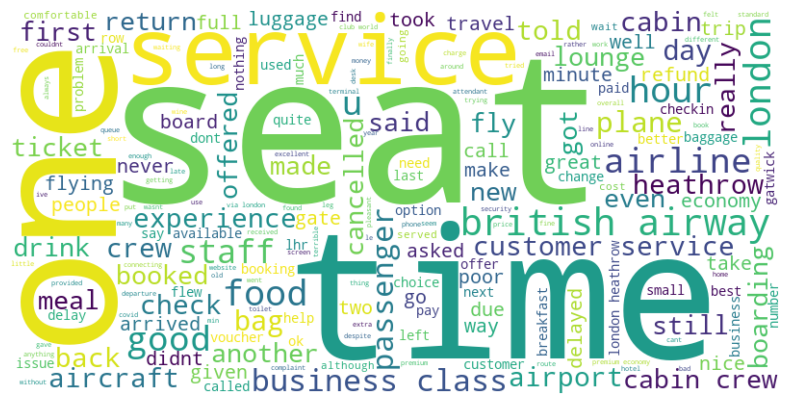

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combining all lemmatized tokens into a single text
all_tokens = ' '.join(' '.join(tokens) for tokens in df['lemmatized'])

# Creating a list of words to exclude
exclude_words = ['british airway', 'ba', 'flight', 'british airway']

# Removing stopwords and exclude words from the text
filtered_tokens = [word for word in all_tokens.split() if word.lower() not in exclude_words]

# Joining the filtered tokens back into a single string
filtered_text = ' '.join(filtered_tokens)

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Displaying the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


/Users/aravind/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


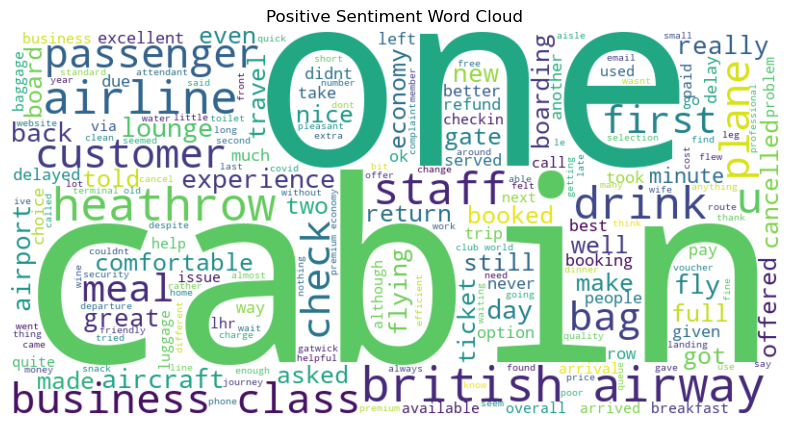

/Users/aravind/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


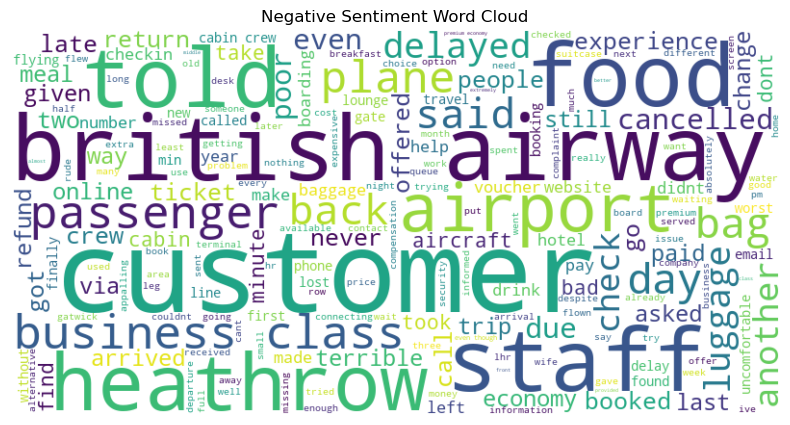

/Users/aravind/anaconda3/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


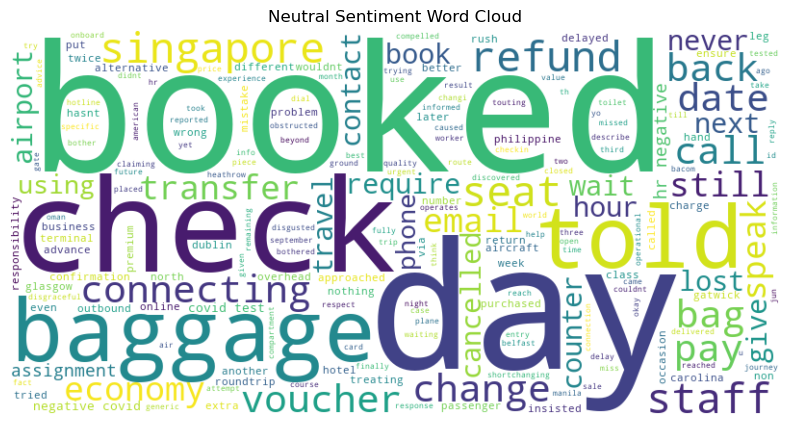

In [84]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


# Combining lemmatized tokens for each sentiment category
positive_tokens = ' '.join(' '.join(tokens) for tokens in df[df['sentiment_label'] == 'positive']['lemmatized'])
negative_tokens = ' '.join(' '.join(tokens) for tokens in df[df['sentiment_label'] == 'negative']['lemmatized'])
neutral_tokens = ' '.join(' '.join(tokens) for tokens in df[df['sentiment_label'] == 'neutral']['lemmatized'])

# Defining the number of most common words to remove
num_common_words_to_remove = 10

# Getting the most common words in each sentiment category
common_positive_words = [word for word, _ in Counter(positive_tokens.split()).most_common(num_common_words_to_remove)]
common_negative_words = [word for word, _ in Counter(negative_tokens.split()).most_common(num_common_words_to_remove)]
common_neutral_words = [word for word, _ in Counter(neutral_tokens.split()).most_common(num_common_words_to_remove)]

# Functions to remove common words from tokens
def remove_common_words(tokens, common_words):
    return [token for token in tokens if token not in common_words]

# Removing common words from tokens for each sentiment category
df['positive_tokens_cleaned'] = df[df['sentiment_label'] == 'positive']['lemmatized'].apply(lambda tokens: remove_common_words(tokens, common_positive_words))
df['negative_tokens_cleaned'] = df[df['sentiment_label'] == 'negative']['lemmatized'].apply(lambda tokens: remove_common_words(tokens, common_negative_words))
df['neutral_tokens_cleaned'] = df[df['sentiment_label'] == 'neutral']['lemmatized'].apply(lambda tokens: remove_common_words(tokens, common_neutral_words))

# Generating word clouds for each sentiment category and save as PNG images
def generate_and_save_word_cloud(all_tokens, title, filename):
    flattened_tokens = [token for tokens in all_tokens if isinstance(tokens, list) for token in tokens]
    filtered_text = ' '.join(flattened_tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(filename, format='png')  # Save the word cloud as PNG image
    plt.show()

# Defining filenames for saving
positive_filename = 'positive_word_cloud.png'
negative_filename = 'negative_word_cloud.png'
neutral_filename = 'neutral_word_cloud.png'

# Generating and save word clouds
generate_and_save_word_cloud(df['positive_tokens_cleaned'], 'Positive Sentiment Word Cloud', positive_filename)
generate_and_save_word_cloud(df['negative_tokens_cleaned'], 'Negative Sentiment Word Cloud', negative_filename)
generate_and_save_word_cloud(df['neutral_tokens_cleaned'], 'Neutral Sentiment Word Cloud', neutral_filename)
